In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [5]:
#checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#seems there are no null values
#it seems there are zero values in citric acid column 
# lets deal with it

In [7]:
data['citric acid']=data['citric acid'].replace(0,data['citric acid'].mean())

In [8]:
# now we have dealt with zeros also
#lets check the outliers using box plot
# for that we have to import library
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

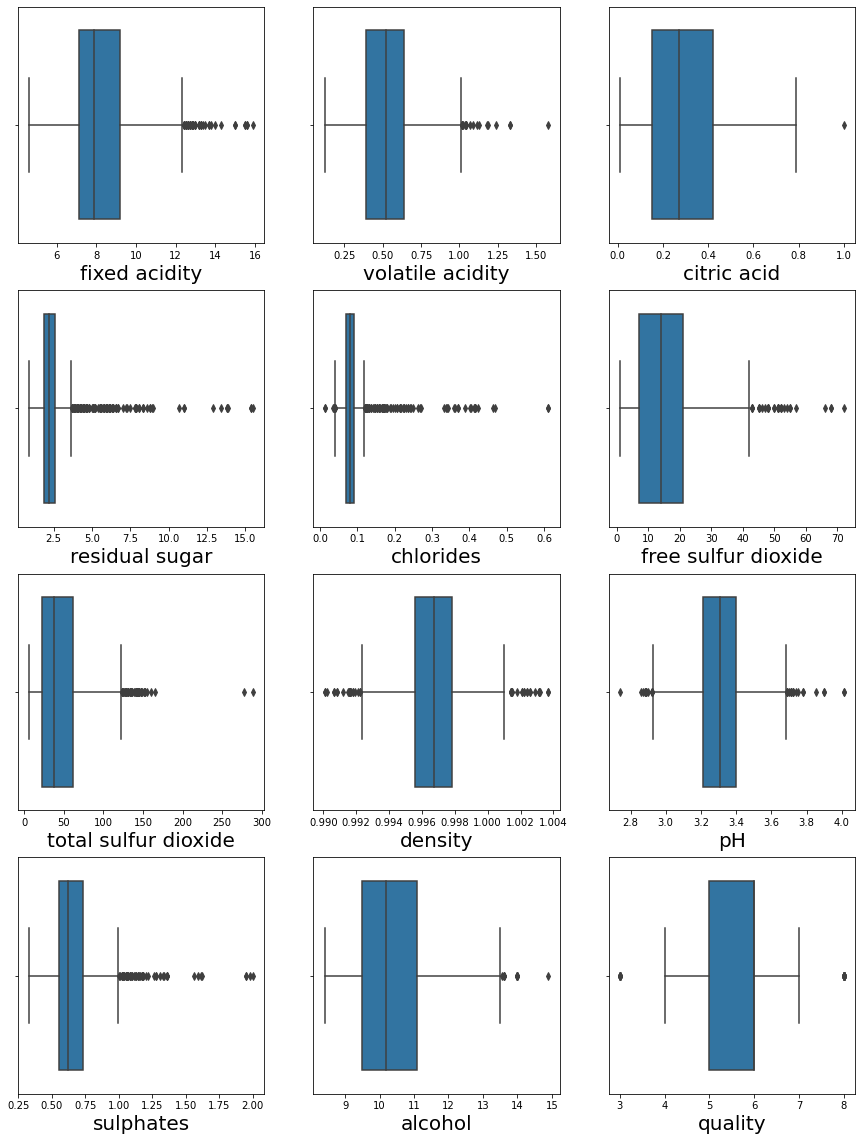

In [10]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
# there are so many outliers 
# we will deal wiht that using outlier detection formulae

In [13]:
#find the iqr(inter quantile range)to identify outliers
#1st quantile
q1=data.quantile(0.25)
# 3rd quantile
q3=data.quantile(0.75)
#iqr
iqr=q3-q1
print(q1)
print(q3)
print(iqr)

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.1500
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64
fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64
fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.270000
residual sugar           0.700000
chlorides         

In [45]:

fix_high=q3['fixed acidity']+(1.5*iqr['fixed acidity'])


In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.293345,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177148,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.270976,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
#validating one outlier
fix_high=q3['fixed acidity']+(1.5*iqr['fixed acidity'])


In [48]:
abc=np.where(data['fixed acidity']>fix_high)
abc

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [49]:
# dropping the outliers
data=data.drop(data.index[abc])
data.shape

(1550, 12)

In [50]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
#in this way we will deal with other outlier columns 
vol_high=q3['volatile acidity']+(1.5*iqr['volatile acidity'])
vol_high


1.0150000000000001

In [52]:
abc=np.where(data['volatile acidity']>vol_high)
abc

(array([  38,   94,  120,  126,  127,  134,  199,  521,  627,  644,  654,
         659,  664,  678,  851, 1212, 1250, 1263, 1418], dtype=int64),)

In [53]:
# dropping the outliers
data=data.drop(data.index[abc])
data.shape

(1531, 12)

In [54]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:

citr_high=q3['citric acid']+(1.5*iqr['citric acid'])
citr_high


0.825

In [56]:

abc=np.where(data['citric acid']>citr_high)
abc

(array([145], dtype=int64),)

In [57]:
# as there is only one outlier in citric acid column  we will not delete this

In [58]:

sugar_high=q3['residual sugar']+(1.5*iqr['residual sugar'])
sugar_high


3.6500000000000004

In [59]:

abc=np.where(data['residual sugar']>sugar_high)
abc

(array([   9,   11,   14,   15,   18,   33,   35,   38,   39,   54,   56,
          63,   64,  148,  149,  150,  151,  157,  158,  186,  206,  257,
         258,  259,  260,  262,  263,  265,  266,  267,  271,  311,  312,
         314,  352,  355,  369,  370,  374,  382,  386,  388,  424,  447,
         451,  461,  468,  469,  480,  502,  504,  514,  515,  548,  555,
         557,  572,  573,  593,  597,  606,  660,  680,  740,  816,  822,
         827,  840,  841,  847,  848,  850,  854,  860,  878,  881,  883,
         911,  969,  975,  980,  993,  994,  996, 1008, 1011, 1014, 1015,
        1016, 1018, 1023, 1031, 1033, 1051, 1070, 1075, 1084, 1113, 1123,
        1127, 1140, 1162, 1171, 1175, 1180, 1193, 1211, 1223, 1224, 1230,
        1231, 1241, 1264, 1291, 1306, 1321, 1327, 1339, 1345, 1356, 1367,
        1368, 1370, 1374, 1378, 1403, 1406, 1408, 1410, 1433, 1446, 1447,
        1472, 1484, 1490, 1506, 1509, 1521], dtype=int64),)

In [60]:
# dropping the outliers
data=data.drop(data.index[abc])
data.shape

(1393, 12)

In [61]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1389,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1390,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1391,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:

chloro_high=q3['chlorides']+(1.5*iqr['chlorides'])
chloro_high


abc=np.where(data['chlorides']>chloro_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [63]:

sulfur_high=q3['free sulfur dioxide']+(1.5*iqr['free sulfur dioxide'])
sulfur_high


abc=np.where(data['free sulfur dioxide']>sulfur_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1291,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1292,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1293,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:

sulfo_high=q3['total sulfur dioxide']+(1.5*iqr['total sulfur dioxide'])
sulfo_high


abc=np.where(data['total sulfur dioxide']>sulfo_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:

density_high=q3['density']+(1.5*iqr['density'])
density_high


abc=np.where(data['density']>density_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:

pH_high=q3['pH']+(1.5*iqr['pH'])
pH_high


abc=np.where(data['pH']>pH_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1236,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1237,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1238,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [68]:

sulphate_high=q3['sulphates']+(1.5*iqr['sulphates'])
sulphate_high


abc=np.where(data['sulphates']>sulphate_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1216,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1217,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1218,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:

alcohol_high=q3['alcohol']+(1.5*iqr['alcohol'])
chloro_high


abc=np.where(data['alcohol']>alcohol_high)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1208,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1209,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1210,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
# to find and deal with down outliers

chloro_low=q1['chlorides']-(1.5*iqr['chlorides'])
chloro_low


abc=np.where(data['chlorides']<chloro_low)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1200,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1201,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1202,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
# to find and deal with down outliers

density_low=q1['density']-(1.5*iqr['density'])
chloro_low


abc=np.where(data['density']<density_low)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1194,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1195,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1196,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [72]:
# to find and deal with down outliers

pH_low=q1['pH']-(1.5*iqr['pH'])
pH_low


abc=np.where(data['pH']<pH_low)
abc
# dropping the outliers
data=data.drop(data.index[abc])
data.shape
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1190,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1191,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1192,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [73]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
data.shape

(1194, 12)

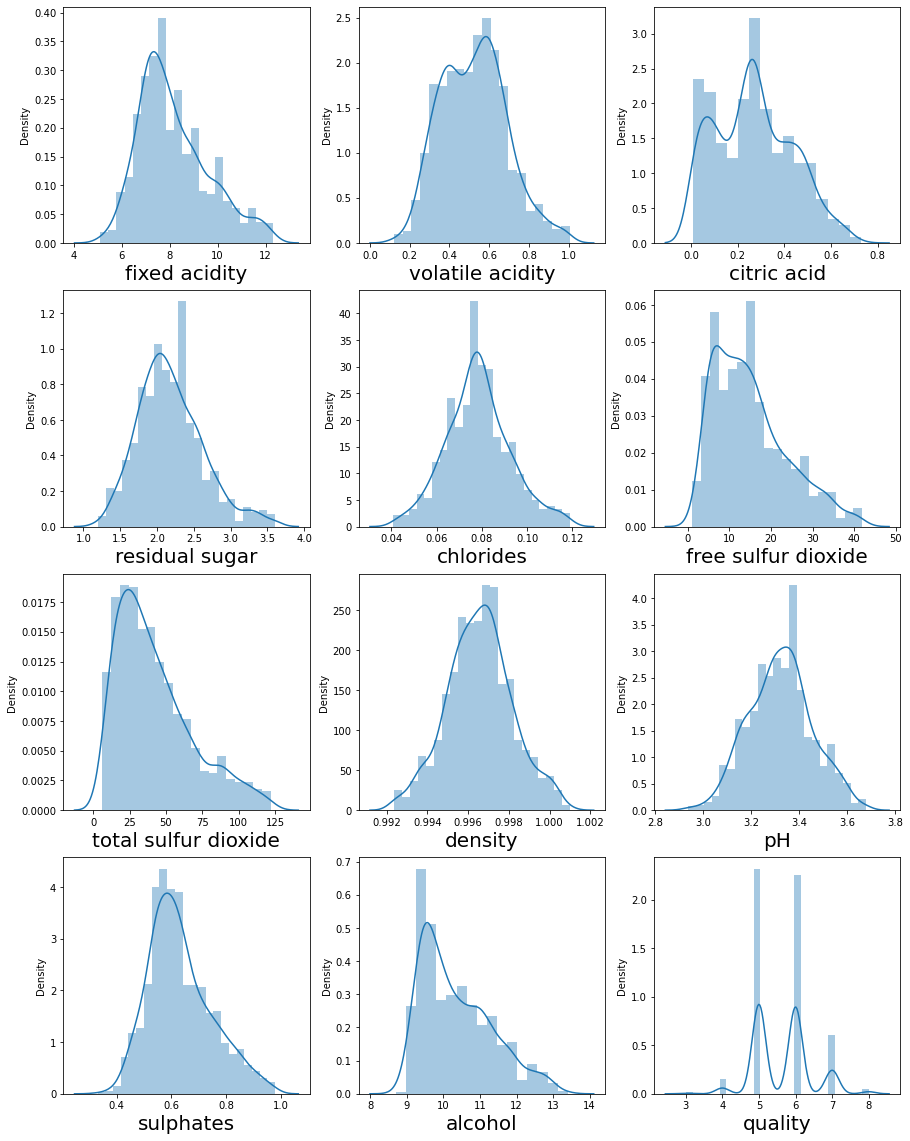

In [75]:
#now we have dealt with the outliers lets plot and see
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [76]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [77]:
#seperating features and label
x=data.drop(columns=['quality'])
y=data['quality']

In [78]:
#now we will scale our data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [79]:
x_scaled.shape

(1194, 11)

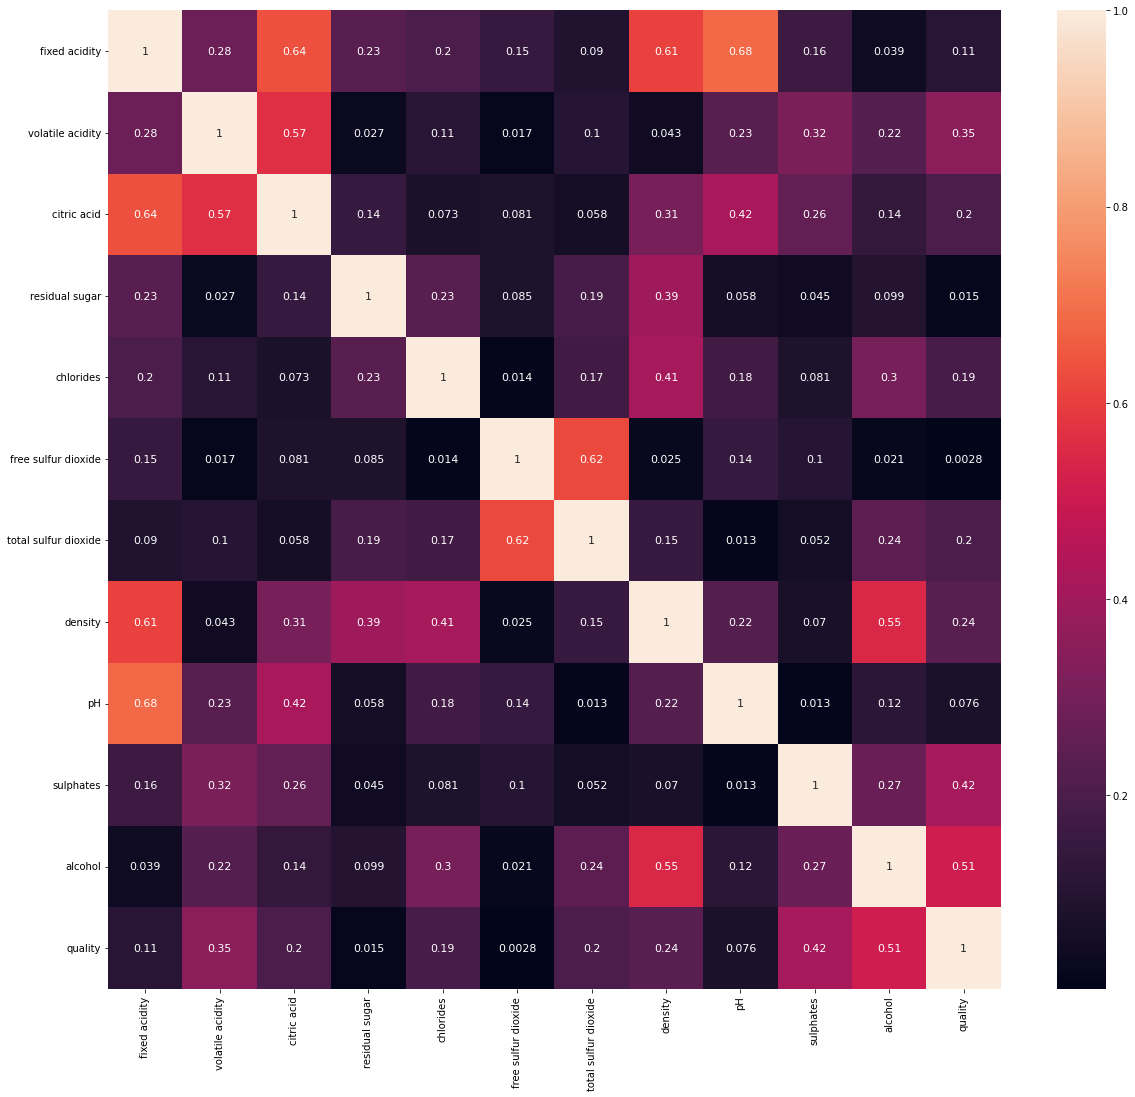

In [82]:
#plotting heatmap to find the multicollinearity problem

df_corr=data.corr().abs()
plt.figure(figsize=(20,18))
sns.heatmap(df_corr,annot=True,annot_kws={'size':11})
plt.show()

In [83]:
#seems no features are correlated
#now we will split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [84]:
# writing one function and we can call as many times to check accuracy score

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n training result \n")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n testing score \n")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\n \n classification report \n",classification_report(y_test,pred,digits=2))
        

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
#initialisation of model
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
# this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
#this is for testing score
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 training result 

Accuracy score:100.00%

 testing score 

accuracy score:63.21%

 
 classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.20      0.29      0.24         7
           5       0.68      0.77      0.72       132
           6       0.67      0.52      0.58       126
           7       0.50      0.72      0.59        29
           8       0.00      0.00      0.00         5

    accuracy                           0.63       299
   macro avg       0.34      0.38      0.35       299
weighted avg       0.63      0.63      0.63       299



In [88]:
params={'criterion':['gini','entropy'],
       'max_depth':range(10,15),
       'min_samples_leaf':range(2,7),
       'max_leaf_nodes':range(4,20),
       'min_samples_split':range(3,15)}

In [89]:
grsh=GridSearchCV(estimator=clf,param_grid=params,cv=5)
grsh.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(4, 20),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(3, 15)})

In [90]:
best_parameters=grsh.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [95]:
#initialising our model again with the best parameters
clf=DecisionTreeClassifier(criterion='entropy',max_depth=14,min_samples_leaf=4,max_leaf_nodes=16,min_samples_split=13)
#train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=13)

In [96]:
# this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
#this is for testing score
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 training result 

Accuracy score:62.57%

 testing score 

accuracy score:61.20%

 
 classification report 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.63      0.90      0.74       132
           6       0.68      0.40      0.51       126
           7       0.36      0.45      0.40        29
           8       0.00      0.00      0.00         5

    accuracy                           0.61       299
   macro avg       0.33      0.35      0.33       299
weighted avg       0.60      0.61      0.58       299



In [97]:
# now we will try to check the accuracy with another model
parameters={'criterion':['gini','entropy'],
           'max_features':["auto","sqrt","log2"]}

In [98]:
rf=RandomForestClassifier()
grsh=GridSearchCV(estimator=rf,param_grid=parameters)
grsh.fit(x_train,y_train)
print(grsh.best_params_)


{'criterion': 'gini', 'max_features': 'sqrt'}


In [99]:
rf=RandomForestClassifier(criterion='gini',max_features='sqrt')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
# this is for training score
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
#this is for testing score
metric_score(rf,x_train,x_test,y_train,y_test,train=False)


 training result 

Accuracy score:100.00%

 testing score 

accuracy score:71.24%

 
 classification report 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.75      0.83      0.78       132
           6       0.70      0.67      0.68       126
           7       0.61      0.69      0.65        29
           8       0.00      0.00      0.00         5

    accuracy                           0.71       299
   macro avg       0.41      0.44      0.42       299
weighted avg       0.68      0.71      0.70       299



In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier()
param_grid={'algorithm':['kd-tree','brute'],
           'leaf_size':[3,5,6,7,8],
           'n_neighbors':[3,5,7,9,11,13]}
grsh=GridSearchCV(estimator=knn,param_grid=param_grid)
grsh.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [104]:
grsh.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 9}

In [119]:
knn=KNeighborsClassifier(algorithm='brute',n_neighbors=9,leaf_size=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=3, n_neighbors=9)

In [120]:
# this is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
#this is for testing score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


 training result 

Accuracy score:66.93%

 testing score 

accuracy score:60.20%

 
 classification report 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.65      0.76      0.70       132
           6       0.60      0.55      0.57       126
           7       0.35      0.38      0.37        29
           8       0.00      0.00      0.00         5

    accuracy                           0.60       299
   macro avg       0.32      0.34      0.33       299
weighted avg       0.58      0.60      0.59       299



In [ ]:
#seems RandomForestClassifier is good for this dataset